In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 读取数据
data = pd.read_csv('Heart Disease Dataset.csv')
# data_True = data[data['HadHeartAttack'] == 'Yes']
# data_False = data[data['HadHeartAttack'] == 'No']
# 
# data = pd.concat([data_True.sample(n=len(data_False), random_state=42, replace=True), data_False])
data.head()


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [3]:
binary_col = ['Sex', 'PhysicalActivities', 'HadAngina', 'HadStroke', 
'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 
'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 
'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear']

multi_col = ['GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'SleepHours', 
'RemovedTeeth', 'HadDiabetes', 'SmokerStatus', 'ECigaretteUsage', 'RaceEthnicityCategory', 
'AgeCategory', 'TetanusLast10Tdap', 'CovidPos']

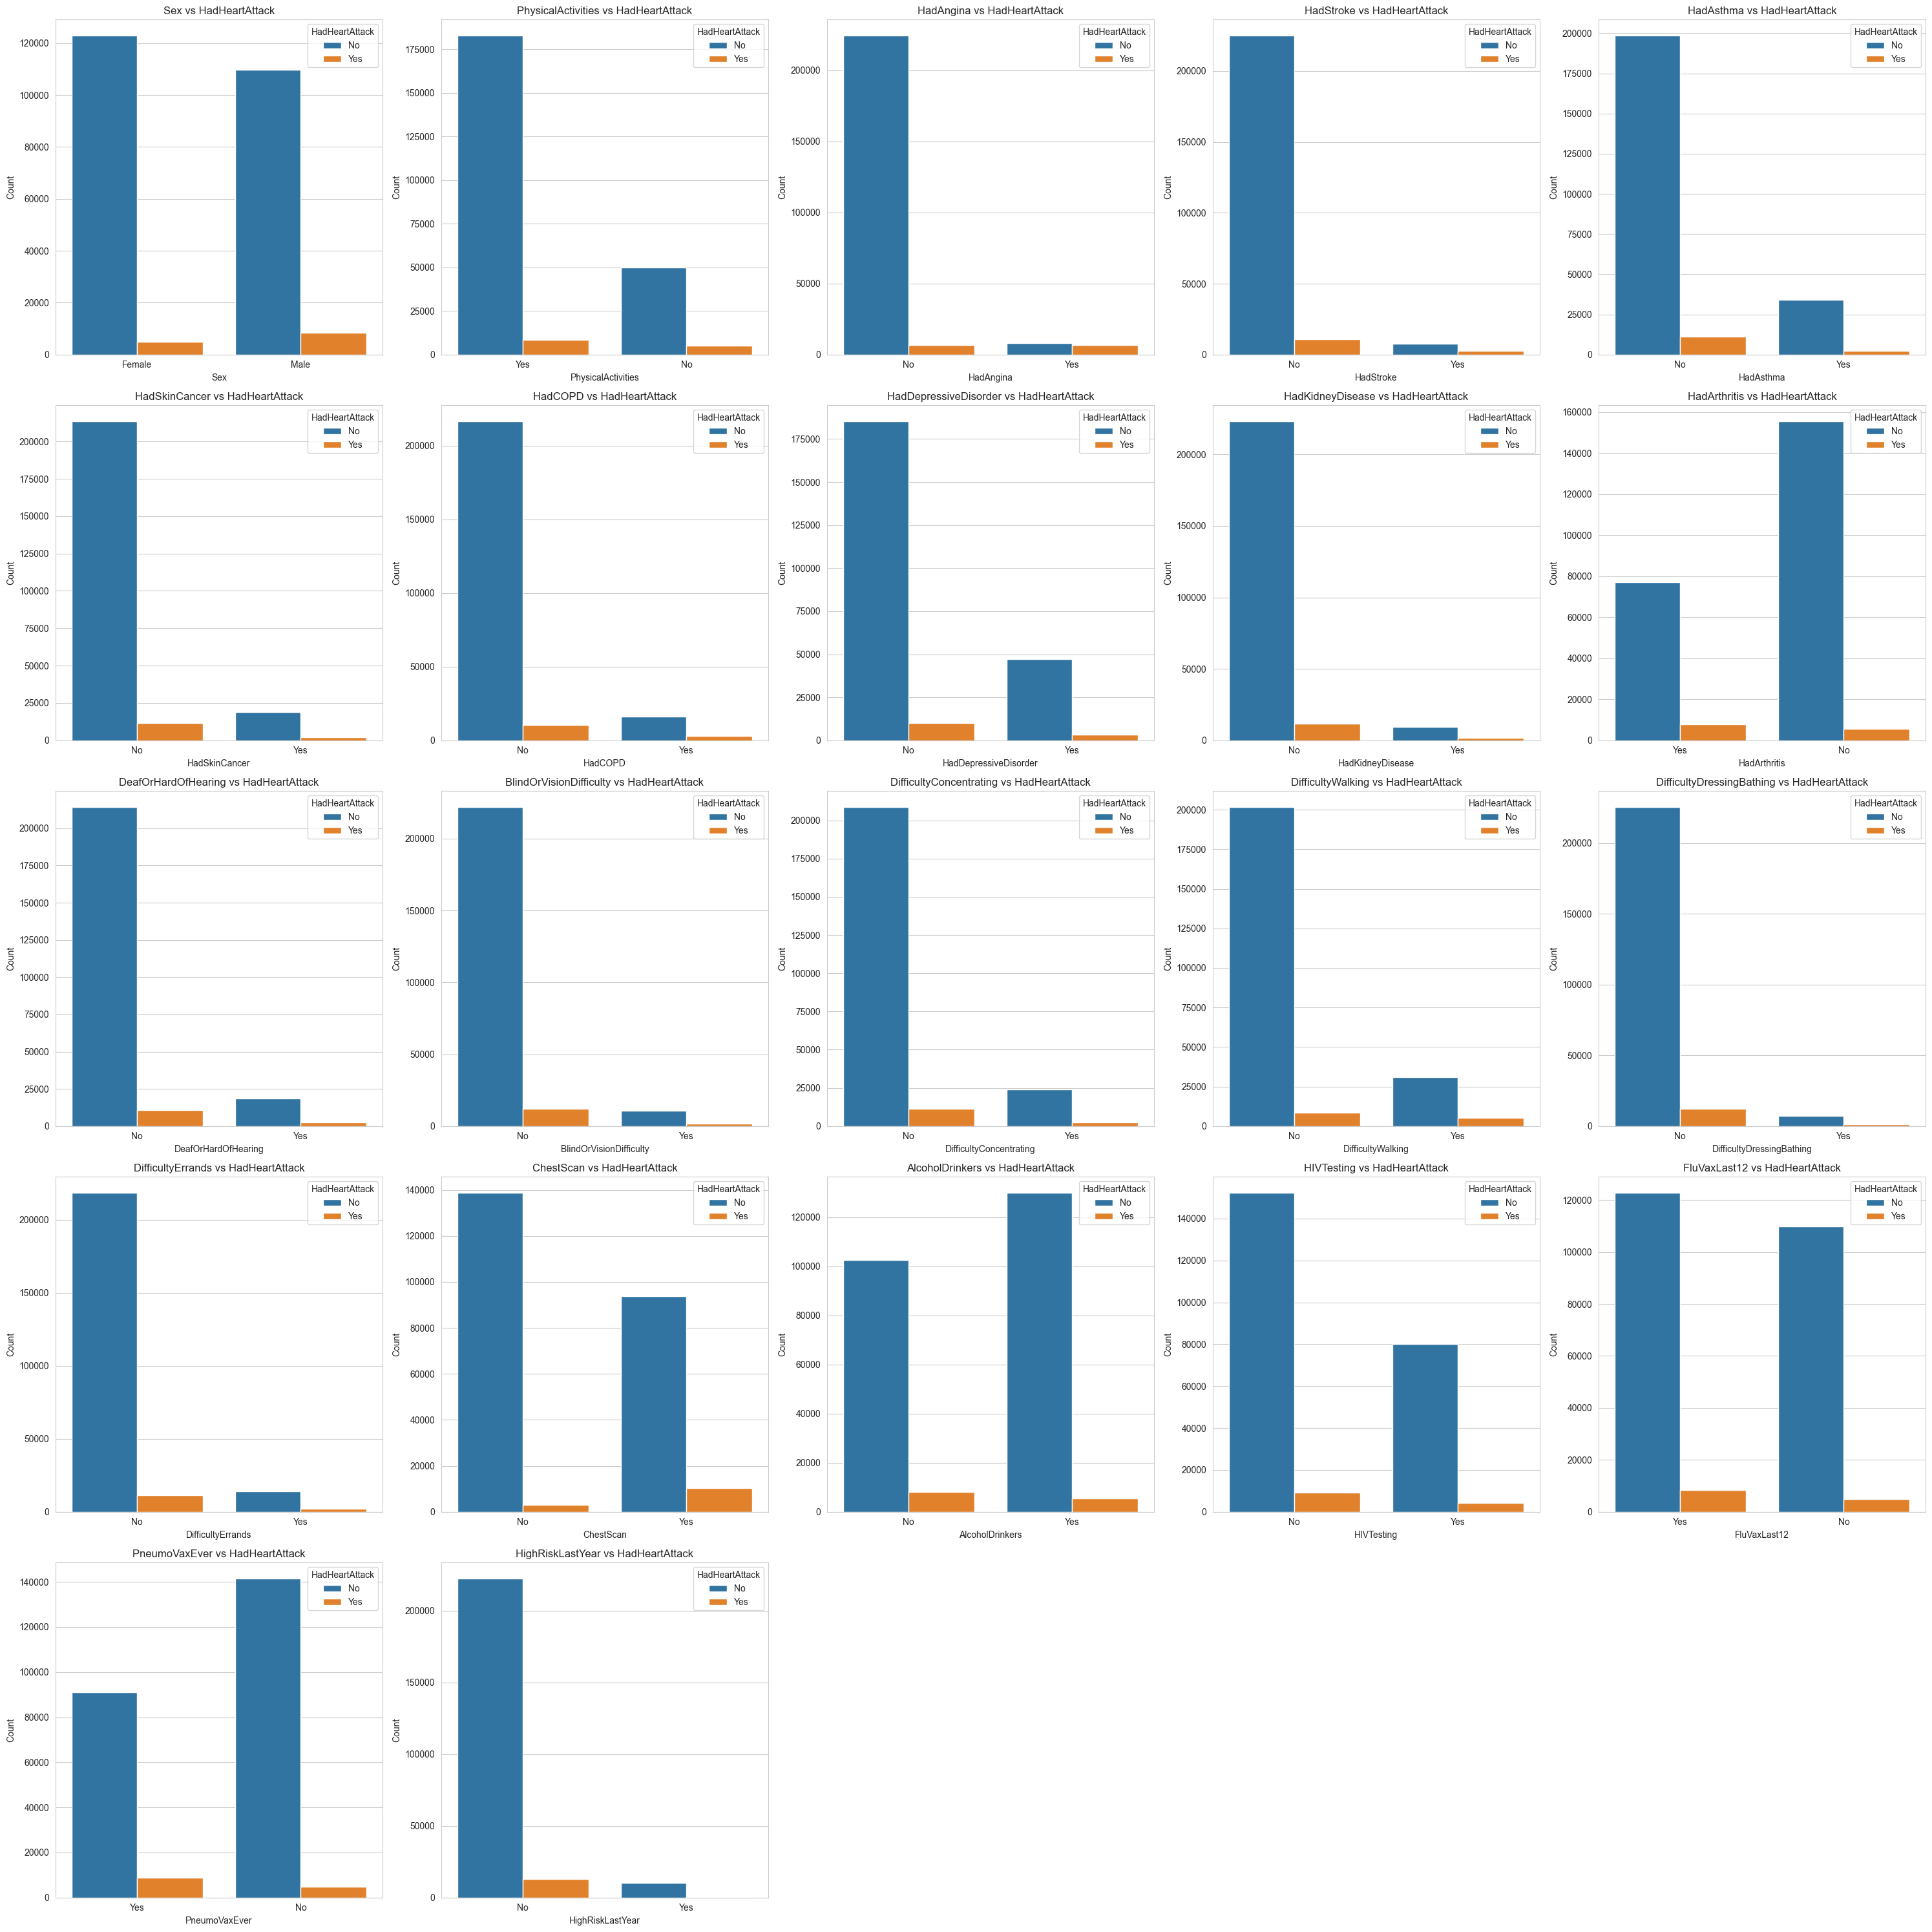

In [4]:
# 假设data是包含所有数据的DataFrame
n = len(binary_col)
n_rows = 5
n_cols = 5

# 创建6行4列的子图布局
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 6))

# 将多余的子图去掉（如果有的话）
for i, col in enumerate(binary_col):
    row = i // n_cols  # 当前行
    col_idx = i % n_cols  # 当前列
    # sns.histplot(data=data, x=col, hue='HadHeartAttack', multiple='dodge', kde=False, ax=axes[row, col_idx])
    sns.countplot(data=data, x=col, hue='HadHeartAttack', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} vs HadHeartAttack')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Count')

# 删除未使用的子图
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()
plt.savefig('../asserts/binary_cls.png')
plt.show()

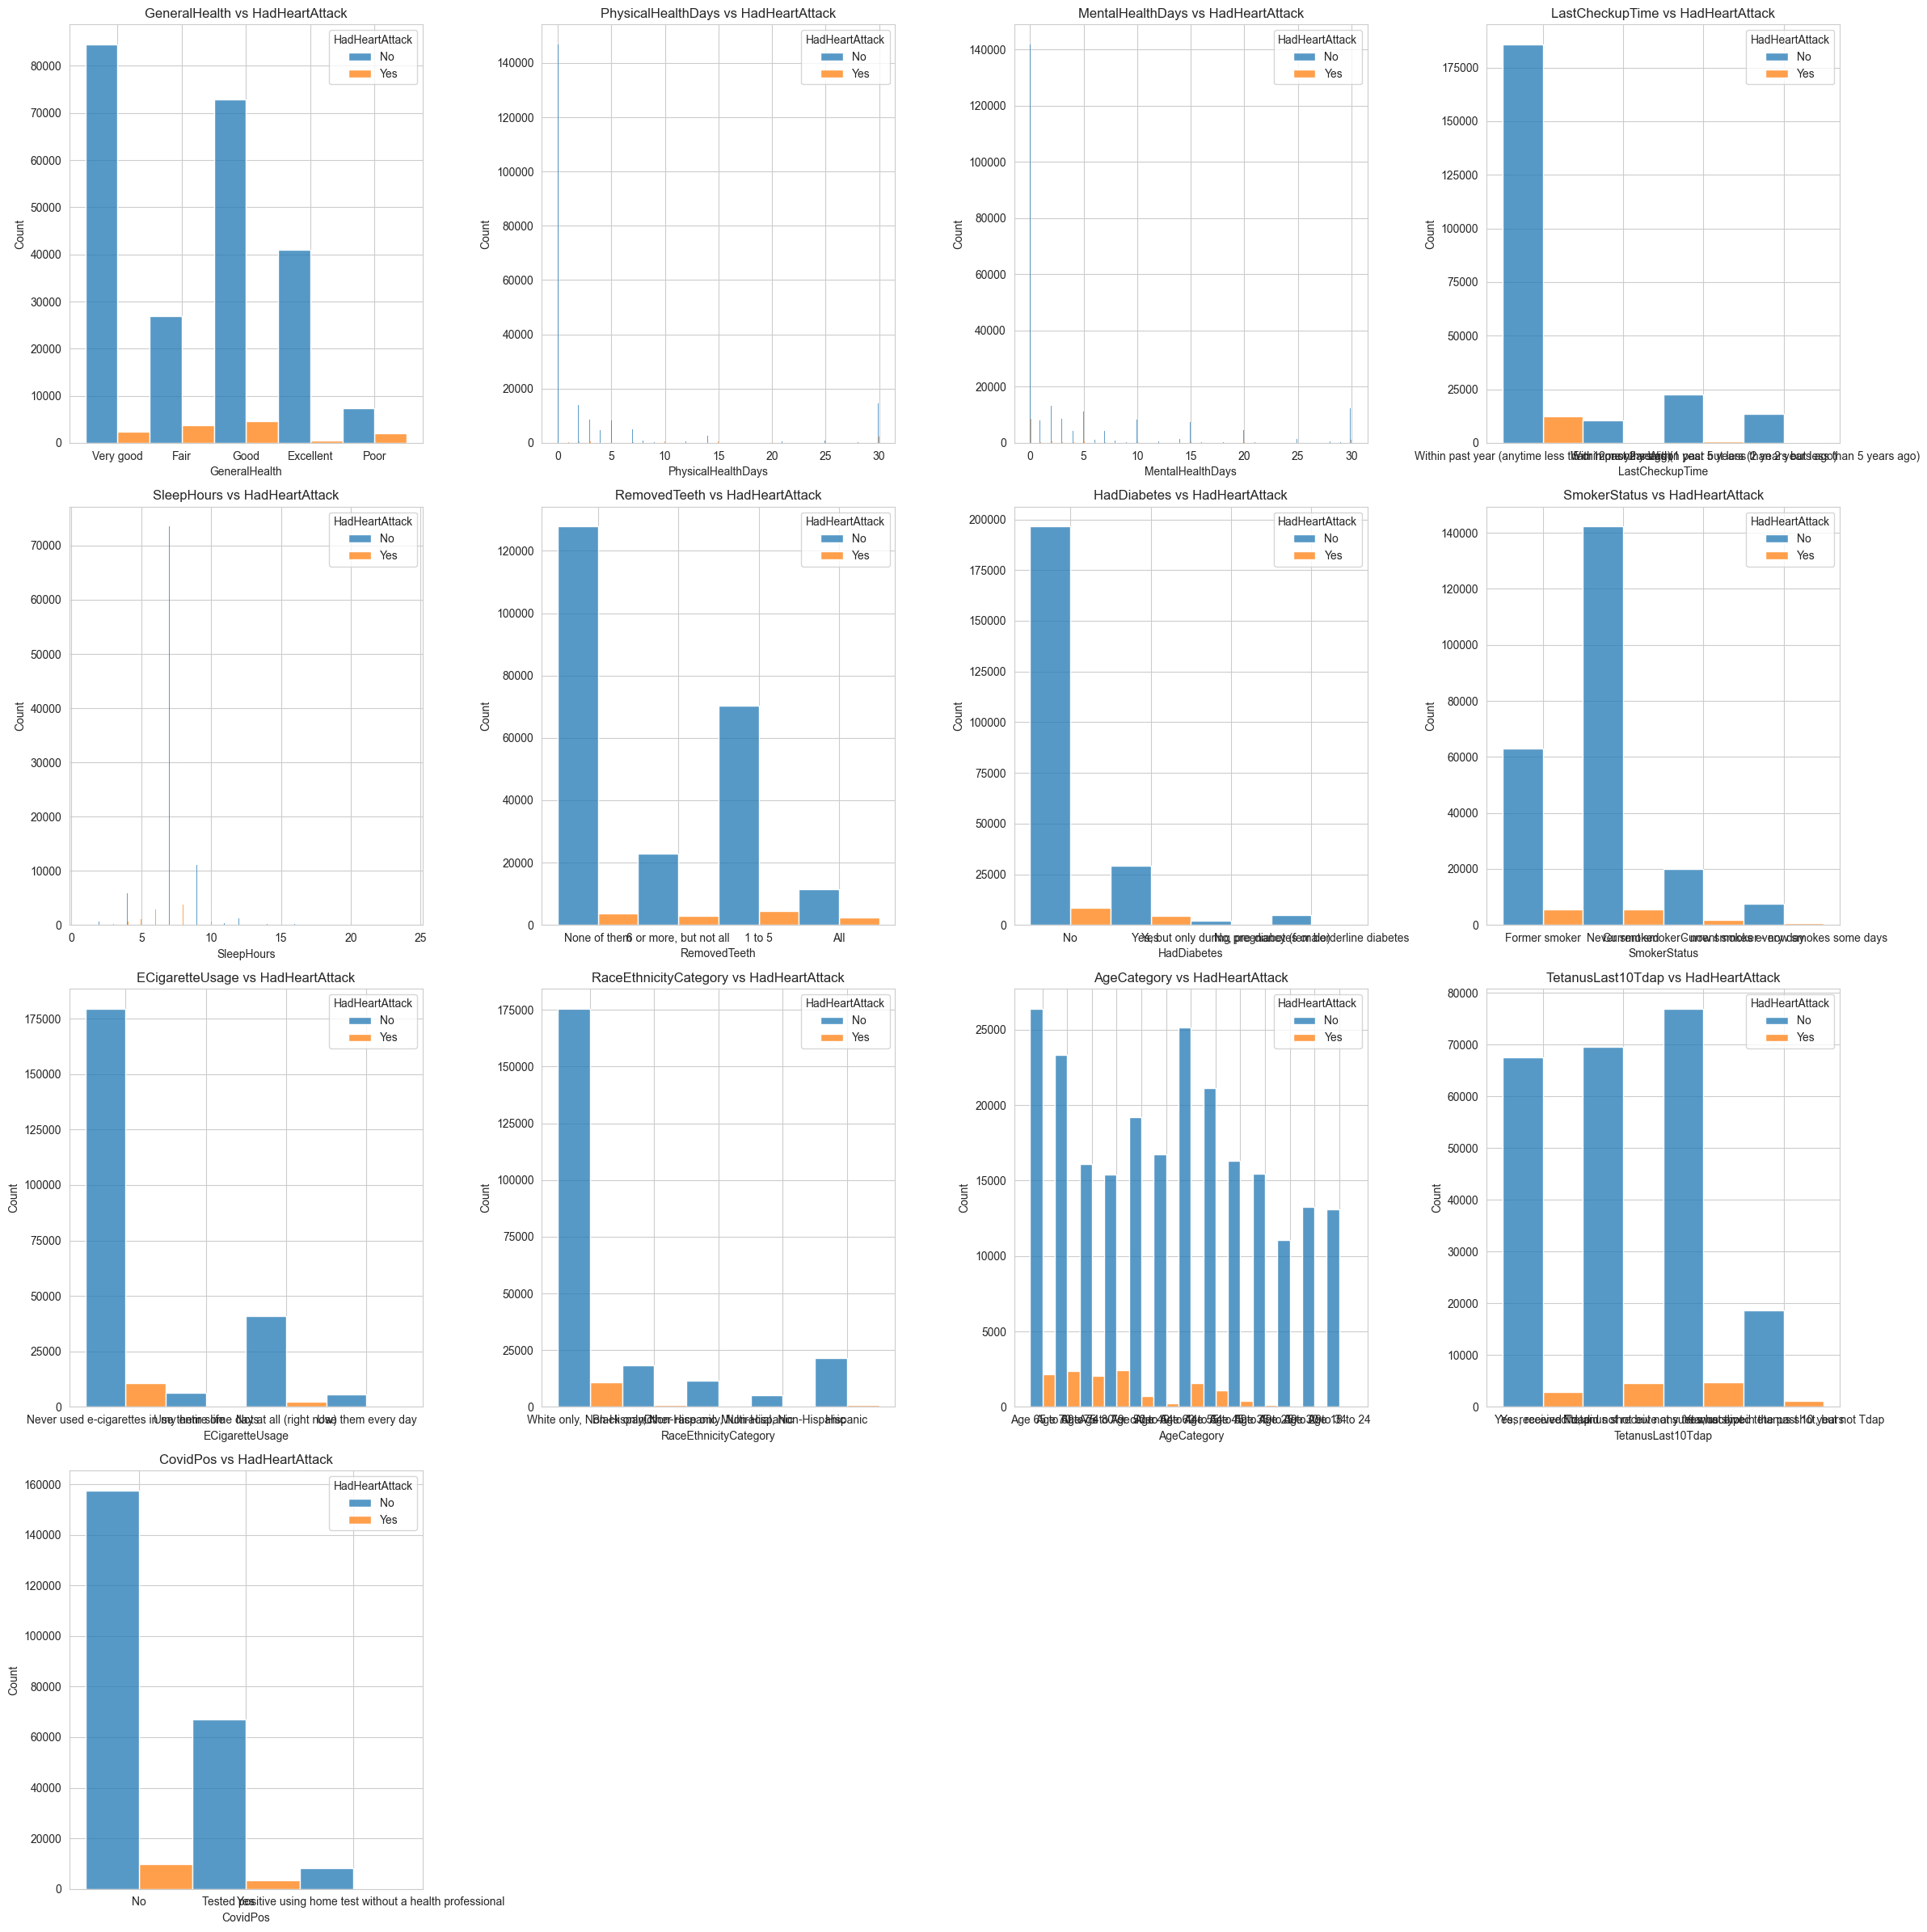

In [5]:
n = len(binary_col)
n_rows = 4
n_cols = 4

# 创建6行4列的子图布局
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 6))

for i, col in enumerate(multi_col):
    row = i // n_cols  # 当前行
    col_idx = i % n_cols  # 当前列
    sns.histplot(data=data, x=col, hue='HadHeartAttack', multiple='dodge', kde=False, ax=axes[row, col_idx])
    # sns.countplot(data=data, x=col, hue='HadHeartAttack', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} vs HadHeartAttack')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Count')
# 删除未使用的子图
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()

In [6]:
from statsmodels.stats.proportion import proportions_ztest

proportion_yes = {}
proportion_no = {}
Z1, Z2 = {}, {}
P1, P2 = {}, {}
for col in binary_col:
    if col == 'Sex':
        Yes = data[data[col] == 'Male']['HadHeartAttack'] == 'Yes'
        No = data[data[col] == 'Female']['HadHeartAttack'] == 'Yes'
    else:
        Yes = data[data[col] == 'Yes']['HadHeartAttack'] == 'Yes'
        No = data[data[col] == 'No']['HadHeartAttack'] == 'Yes'
    proportion_yes[col] = Yes.sum() / len(Yes)
    proportion_no[col] = No.sum() / len(No)
    
    Z1[col], P1[col] = proportions_ztest(
        [Yes.sum(), Yes.sum() + No.sum()], 
        nobs=[len(Yes), len(Yes) + len(No)], 
        alternative='two-sided'
    )
    Z2[col], P2[col] = proportions_ztest(
        [No.sum(), Yes.sum() + No.sum()], 
        nobs=[len(No), len(Yes) + len(No)], 
        alternative='two-sided'
    )

proportion = pd.DataFrame(index=['Yes', 'No', 'difference', 'Z-statistic', 'P-value'], columns=binary_col)

proportion.loc['Yes'] = proportion_yes
proportion.loc['No'] = proportion_no
proportion.loc['difference'] = proportion.loc['Yes'] - proportion.loc['No']
proportion.loc['Z1'] = Z1
proportion.loc['Z2'] = Z2
proportion.loc['P1'] = P1
proportion.loc['P2'] = P2

proportion.T.to_csv('proportion.csv')